In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline
os.getcwd(),os.listdir()

<function matplotlib.pyplot.show(*args, **kw)>

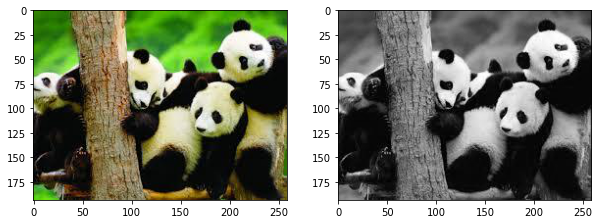

In [16]:
img1 = plt.imread('panda.jfif')
img2 = convert(img1)
%matplotlib inline
plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1), plt.imshow(img1, cmap = 'gray')
plt.subplot(1, 2, 2), plt.imshow(img2, cmap = 'gray')
plt.show

In [15]:
def convert(img1):
    m = img1.shape[0]
    n = img1.shape[1]
    img2 = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            img2[i, j] = get_distance(img1[i, j,:])
    return img2

def get_distance(v, w = [1/3, 1/3, 1/3]):
    a, b, c = v[0], v[1], v[2]
    w1, w2, w3 = w[0], w[1], w[2]
    #d = ((a**2)*w1 + (b**2)*w2 + (c**2)*w3)**.5
    d = ((a*w1)**2 + (b*w2)**2 + (c*w3)**2)**.5
    return d

In [17]:
def get_mask_for_edge():
    return np.array([-1, 0, 1, -2, 0, 2, -1, 0, 1]).reshape(3, 3)

def apply_mask_for_edge(part_of_image):
    mask = get_mask_for_edge()
    return sum(sum(part_of_image * mask))

def get_edges(img1):
    m = img1.shape[0]
    n = img1.shape[1]
    
    img2 = np.zeros((m, n))
    
    for i in range(3, m-3):
        for j in range(3, n-3):
            poi = img1[i-1 : i+2, j-1 : j+2]
            
            img2[i, j] = apply_mask_for_edge(poi)
    return img2

poi1 = get_mask_for_edge()

apply_mask_for_edge(poi1)

12

<function matplotlib.pyplot.show(*args, **kw)>

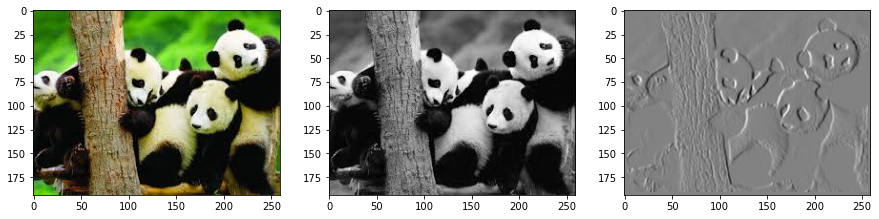

In [18]:
img_with_edges = get_edges(img2)
plt.figure(figsize = (15,15))
plt.subplot(1, 3, 1), plt.imshow(img1, cmap = 'gray')
plt.subplot(1, 3, 2), plt.imshow(img2, cmap = 'gray')
plt.subplot(1, 3, 3), plt.imshow(img_with_edges, cmap = 'gray')
plt.show